### Workspace

In [3]:
%matplotlib notebook

from modsim import *

In [4]:
altitude = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 
            8000, 9000, 10000, 15000, 20000, 25000, 30000,
           40000, 50000, 60000, 70000, 80000]
density = [1.225, 1.112, 1.007, .9093, .8194, .7364, .6601,
          .5900, .5258, .4671, .4135, .1948, .08891, .04008,
          .01841, .003996, .001027, .0003097, .00008283, .000001846]

dd_da = TimeSeries()
for i in range(20):
    x = altitude[i]
    y = density[i]
    dd_da[x] = y

dd_da = interpolate(dd_da, kind='cubic')

In [5]:
condition = Condition(height=90000,
                      thrust_on=200,
                      land = 10,
                      f_thrust=20,
                      mass=1,
                      length=.1,
                      width=.1,
                      dd_da=dd_da,
                      C_d=1,
                      g=9.8,
                      dt=1)

In [96]:
def make_system(condition):
    unpack(condition)
    
    init = State(height=height, velocity=0)
    
    drag_coef = -C_d*length*width / 2
    
    system = System(init=init,
                    dt=dt,
                    thrust_on=thrust_on, land=land,
                    f_thrust=f_thrust,
                    mass=mass,
                    drag_coef=drag_coef,
                    dd_da=dd_da)
    return system

def slope(state, system, dt, count):
    unpack(system)
    height, velocity = state
    
    f_drag = drag_coef * abs(velocity) * velocity * abs(dd_da(height))
    #print(f_drag)
    a_drag = f_drag/mass
    
    if (height < thrust_on):
        f_t= find_thrust_2(height, velocity, g, a_drag, land) * mass
        print(f_t)
    else:
        f_t=0
    


    a_thrust = f_t/mass
    a_grav = -g
    a = a_grav + a_thrust + a_drag
    dV = a*dt
    velocity += dV
    
    dH = velocity*dt
    height += dH
         
    return State(height=height, velocity=velocity)

def find_thrust(height, velocity, g, a_drag, land):
    if height < land:
        a_thrust = g + (velocity)**2/(2*height)
    else:
        a_thrust = (g-a_drag) + (abs(velocity)-10)**2/(2*height)
   # if a_thrust < 10:
    #    a_thrust = 0
        
    #else:
    #    a_thrust = .8 * (g + velocity**2/(2*height))
    return a_thrust

def find_thrust_2(height, velocity, g, a_drag, land):
    a_thrust = (g-abs(a_drag)) + (abs(velocity)**2)/(2*height)
    return a_thrust

def run_ode_best(system, slope_func):
    count = 0
    iteration = 0
    unpack(system)
    frame = TimeFrame(columns=init.index)
    
    frame.loc[0] = init
    while(frame.loc[count].velocity <= 0):
        frame.loc[count+dt] = slope_func(frame.loc[count], system, dt, count)
        count += dt
        
        iteration += 1
        if iteration >= 5000:
            system.results = frame
            system.count = count
            return
    system.count = count
    system.results = frame
    
def plot_height(system):
    newfig()
    plot(system.results.height, label='y')
        
    decorate(xlabel='Time (s)',
             ylabel='Position (m)')
    
def plot_velocity(system):
    newfig()
    plot(system.results.velocity, label='v')
    
    decorate(xlabel='Time (s)',
             ylabel='Velocity (m)')
    
def plot_atmosphere():
    newfig()
    for i in linrange(1,10000, 500):
        plot(i, dd_da(i), 'g-')
    decorate(xlabel='Altitude(m)',
             ylabel='air density(something)')
    
def height_at_zero(system):
    t_end = system.count
    t_start = system.count - system.dt
    height = (system.results.height[t_start] + system.results.height[t_end])/2
    return height

def run_simulation():
    system = make_system(condition)
    run_ode_best(system, slope)
    system.final_height = height_at_zero(system)
    
    return system

In [97]:
condition.set(dt= .1)
condition.set(t_end = 20)
condition.set(height = 100000)
condition.set(thrust_on = 90000)

#run2 = make_system(condition)
#run_ode_better(run2, slope)
run1 = run_simulation()
#run1.results

10.737542311
10.7386515624
10.739754447
10.7408509938
10.741941232
10.7430251905
10.7441028982
10.7451743839
10.7462396763
10.7472988042
10.7483517962
10.7493986807
10.7504394864
10.7514742415
10.7525029744
10.7535257134
10.7545424867
10.7555533224
10.7565582485
10.757557293
10.7585504839
10.759537849
10.7605194161
10.7614952129
10.7624652669
10.7634296059
10.7643882573
10.7653412485
10.7662886069
10.7672303598
10.7681665344
10.769097158
10.7700222575
10.77094186
10.7718559925
10.7727646818
10.7736679548
10.7745658383
10.7754583588
10.7763455432
10.7772274178
10.7781040092
10.7789753438
10.7798414479
10.7807023479
10.78155807
10.7824086403
10.7832540849
10.7840944298
10.7849297009
10.7857599243
10.7865851256
10.7874053307
10.7882205651
10.7890308547
10.7898362248
10.7906367011
10.7914323089
10.7922230735
10.7930090204
10.7937901747
10.7945665615
10.7953382061
10.7961051334
10.7968673683
10.7976249359
10.7983778609
10.7991261682
10.7998698823
10.8006090281
10.80134363
10.8020737127
10.8

10.7296804598
10.7290833485
10.7284845199
10.7278839736
10.7272817087
10.7266777247
10.7260720209
10.7254645969
10.7248554519
10.7242445856
10.7236319973
10.7230176866
10.7224016529
10.7217838959
10.721164415
10.7205432099
10.7199202801
10.7192956252
10.718669245
10.718041139
10.7174113068
10.7167797483
10.7161464631
10.715511451
10.7148747116
10.7142362448
10.7135960503
10.712954128
10.7123104776
10.7116650991
10.7110179922
10.7103691569
10.709718593
10.7090663005
10.7084122793
10.7077565294
10.7070990507
10.7064398433
10.705778907
10.7051162421
10.7044518484
10.7037857261
10.7031178753
10.702448296
10.7017769884
10.7011039527
10.7004291888
10.6997526972
10.6990744778
10.698394531
10.6977128569
10.6970294559
10.6963443281
10.6956574738
10.6949688934
10.6942785872
10.6935865554
10.6928927985
10.6921973168
10.6915001106
10.6908011805
10.6901005267
10.6893981498
10.6886940501
10.6879882283
10.6872806846
10.6865714198
10.6858604341
10.6851477283
10.6844333029
10.6837171583
10.6829992953
1

9.60767313945
9.60301273908
9.59833652542
9.59364449232
9.58893663389
9.5842129445
9.5794734188
9.57471805171
9.5699468384
9.56515977434
9.56035685523
9.55553807706
9.55070343607
9.54585292877
9.54098655194
9.53610430259
9.53120617804
9.52629217583
9.52136229377
9.51641652994
9.51145488267
9.50647735054
9.5014839324
9.49647462733
9.4914494347
9.48640835411
9.48135138541
9.47627852871
9.47118978438
9.46608515302
9.4609646355
9.45582823291
9.45067594663
9.44550777825
9.44032372962
9.43512380283
9.42990800023
9.42467632439
9.41942877815
9.41416536456
9.40888608695
9.40359094885
9.39827995406
9.39295310661
9.38761041076
9.38225187102
9.37687749212
9.37148727904
9.366081237
9.36065937143
9.35522168802
9.34976819268
9.34429889155
9.33881379099
9.33331289763
9.32779621828
9.32226376002
9.31671553012
9.31115153612
9.30557178575
9.29997628697
9.29436504799
9.28873807722
9.28309538331
9.2774369751
9.2717628617
9.2660730524
9.26036755673
9.25464638444
9.24890954548
9.24315705005
9.23738890854
9.2

1.72915368923
1.70276957506
1.67631305483
1.6497840719
1.62318257213
1.59650850383
1.56976181774
1.54294246708
1.51605040747
1.48908559696
1.46204799602
1.4349375675
1.40775427667
1.38049809115
1.35316898097
1.32576691848
1.29829187843
1.27074383786
1.2431227762
1.21542867517
1.1876615188
1.15982129345
1.13190798777
1.10392159267
1.07586210137
1.04772950934
1.01952381432
0.991245016284
0.962893117452
0.934468122276
0.905970037425
0.877398871782
0.848754636429
0.820037344643
0.791247011883
0.762383655781
0.733447296136
0.7044379549
0.675355656174
0.646200426193
0.616972293323
0.587671288046
0.558297442955
0.528850792745
0.499331374199
0.469739226185
0.440074389644
0.410336907579
0.380526825051
0.350644189166
0.320689049068
0.290661455927
0.260561462935
0.230389125293
0.200144500203
0.169827646861
0.139438626445
0.10897750211
0.0784443512053
0.0478393322213
0.0171626365923
-0.0135855430224
-0.0444050128277
-0.0752955778992
-0.106257042189
-0.137289208532
-0.168391878653
-0.199564853171
-

-22.8175098517
-22.8738263328
-22.930116307
-22.9863782195
-23.0426105243
-23.0988116844
-23.1549801713
-23.2111144652
-23.2672130551
-23.3232744384
-23.3792971213
-23.4352796185
-23.4912204533
-23.5471181574
-23.6029712711
-23.6587783432
-23.7145379308
-23.7702485995
-23.8259089234
-23.8815174848
-23.9370728742
-23.9925736909
-24.0480185419
-24.1034060428
-24.1587348173
-24.2140034975
-24.2692107234
-24.3243551432
-24.3794354133
-24.4344501983
-24.4893981707
-24.5442780111
-24.599088408
-24.653828058
-24.7084956658
-24.7630899437
-24.8176096123
-24.8720533998
-24.9264200423
-24.9807082839
-25.0349168763
-25.0890445791
-25.1430901596
-25.1970523929
-25.2509300619
-25.3047219568
-25.3584268759
-25.4120436249
-25.4655710171
-25.5190078734
-25.5723530224
-25.6256053
-25.6787635497
-25.7318266226
-25.7847933771
-25.837662679
-25.8904334017
-25.9431044257
-25.9956746392
-26.0481429375
-26.1005082231
-26.1527694061
-26.2049254037
-26.2569751402
-26.3089175474
-26.3607515639
-26.4124761359
-2

-32.0134440751
-31.9879787163
-31.9623852111
-31.9366636983
-31.9108143178
-31.8848372107
-31.8587325194
-31.8325003871
-31.8061409585
-31.7796543795
-31.7530407967
-31.7263003584
-31.6994332137
-31.672439513
-31.6453194297
-31.6180731817
-31.5907009927
-31.5632030863
-31.5355796867
-31.5078310179
-31.4799573045
-31.4519587709
-31.4238356421
-31.395588143
-31.3672164988
-31.3387209351
-31.3101016775
-31.2813589518
-31.2524929842
-31.223504001
-31.1943922288
-31.1651578943
-31.1358012247
-31.1063224471
-31.0767217891
-31.0469994785
-31.0171557431
-30.9871908112
-30.9571049114
-30.9268982722
-30.8965711228
-30.8661236924
-30.8355562103
-30.8048689064
-30.7740620108
-30.7431357535
-30.7120903652
-30.6809260768
-30.6496431191
-30.6182417237
-30.5867221221
-30.5550845461
-30.523329228
-30.4914564002
-30.4594662955
-30.4273591467
-30.3951351873
-30.3627946509
-30.3303377711
-30.2977647824
-30.265075919
-30.2322714157
-30.1993515076
-30.16631643
-30.1331664186
-30.0999017093
-30.0665225383
-3

-4.57483744732
-4.52115517124
-4.4675187828
-4.41392862057
-4.36038502272
-4.30688832707
-4.25343887105
-4.20003699172
-4.14668302577
-4.09337730948
-4.04012017877
-3.98691196918
-3.93375301585
-3.88064365354
-3.82758421662
-3.77457503909
-3.72161645453
-3.66870879615
-3.61585239675
-3.56304758877
-3.51029470421
-3.4575940747
-3.40494603146
-3.35235090533
-3.29980902672
-3.24732072566
-3.19488633176
-3.14250617425
-3.09018058192
-3.03790988317
-2.985694406
-2.93353447798
-2.88143042627
-2.82938257764
-2.77739125841
-2.72545679452
-2.67357951146
-2.62175973431
-2.56999778775
-2.51829399601
-2.46664868291
-2.41506217184
-2.36353478578
-2.31206684726
-2.26065867839
-2.20931060086
-2.15802293591
-2.10679600435
-2.05563012657
-2.00452562251
-1.95348281167
-1.90250201314
-1.85158354552
-1.80072772701
-1.74993487535
-1.69920530784
-1.64853934132
-1.59793729221
-1.54739947645
-1.49692620955
-1.44651780656
-1.39617458208
-1.34589685026
-1.29568492478
-1.24553911887
-1.1954597453
-1.14544711638


9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8
9.8


In [98]:
print(run1.count)
print(run1.dt)
print(run1.final_height)
#print(run1.results.height)

500.0000000000452
0.1
-1.41730068661e-12


<IPython.core.display.Javascript object>


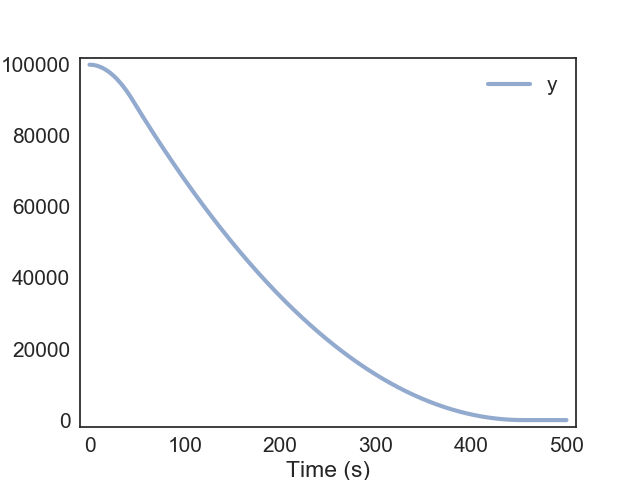

<IPython.core.display.Javascript object>


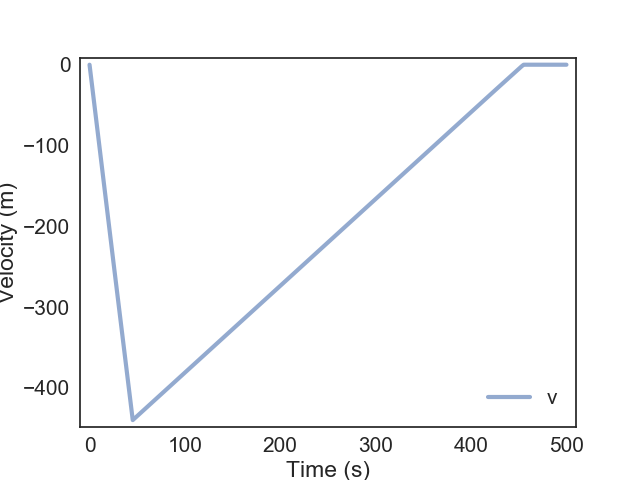

In [99]:
plot_height(run1)
plot_velocity(run1)